DADOS ORIGINAIS CARREGADOS:
    Territorialidade  Posição IDHM   IDHM  Posição IDHM Renda  IDHM Renda  \
0   Distrito Federal             1  0.814                   1       0.821   
1          São Paulo             2  0.806                   2       0.771   
2     Santa Catarina             3  0.792                   4       0.759   
3       Minas Gerais             4  0.774                   9       0.718   
4  Rio Grande do Sul             5  0.771                   3       0.767   

   Posição IDHM Educação  IDHM Educação  Posição IDHM Longevidade  \
0                      2          0.817                         6   
1                      1          0.839                         5   
2                      3          0.790                         3   
3                      7          0.762                         2   
4                     10          0.750                         7   

   IDHM Longevidade  
0             0.803  
1             0.810  
2             0.827  
3     

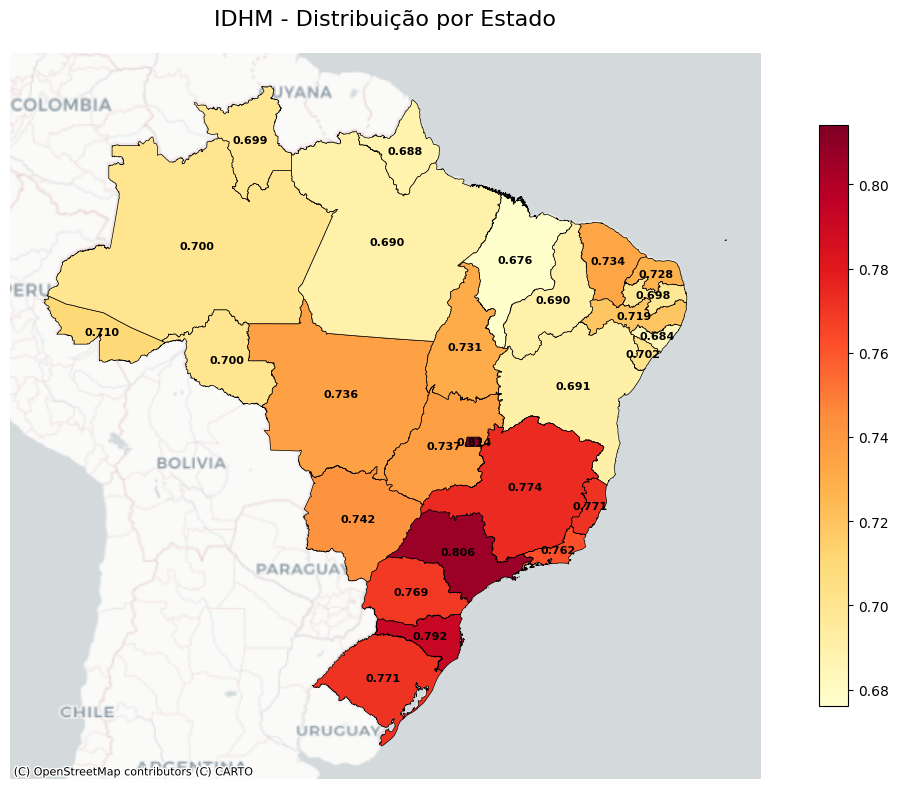

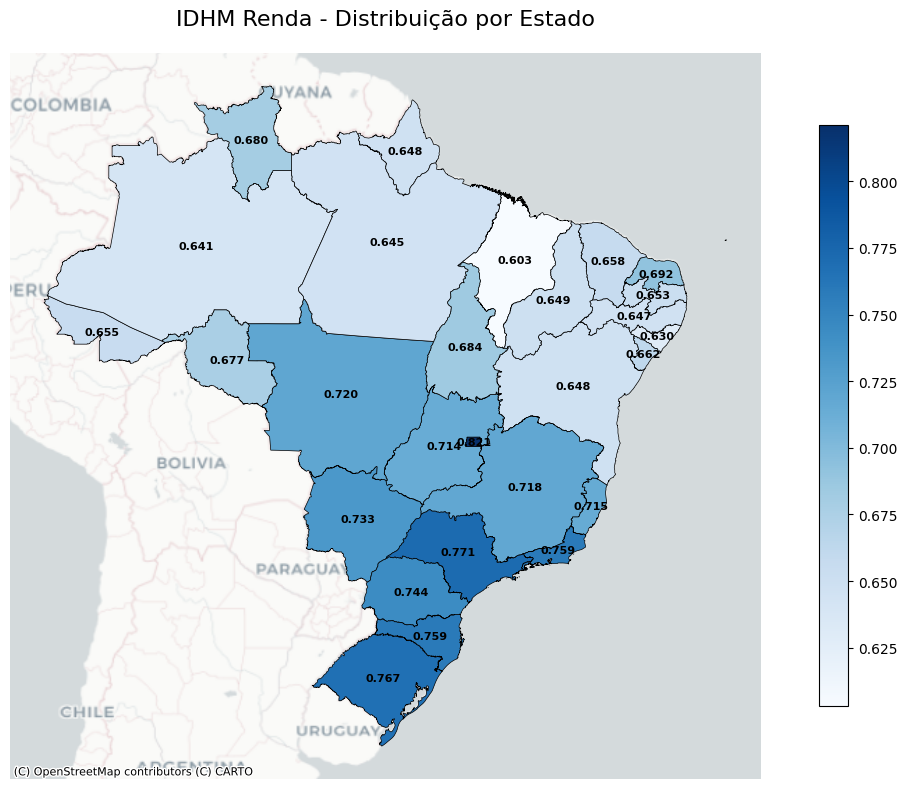

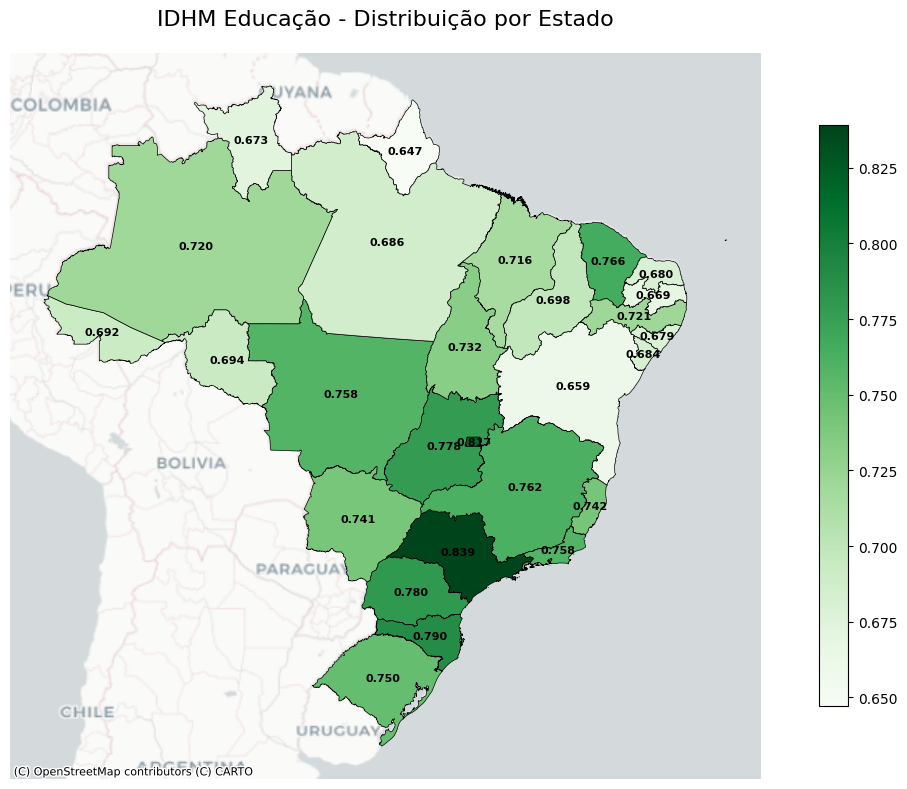

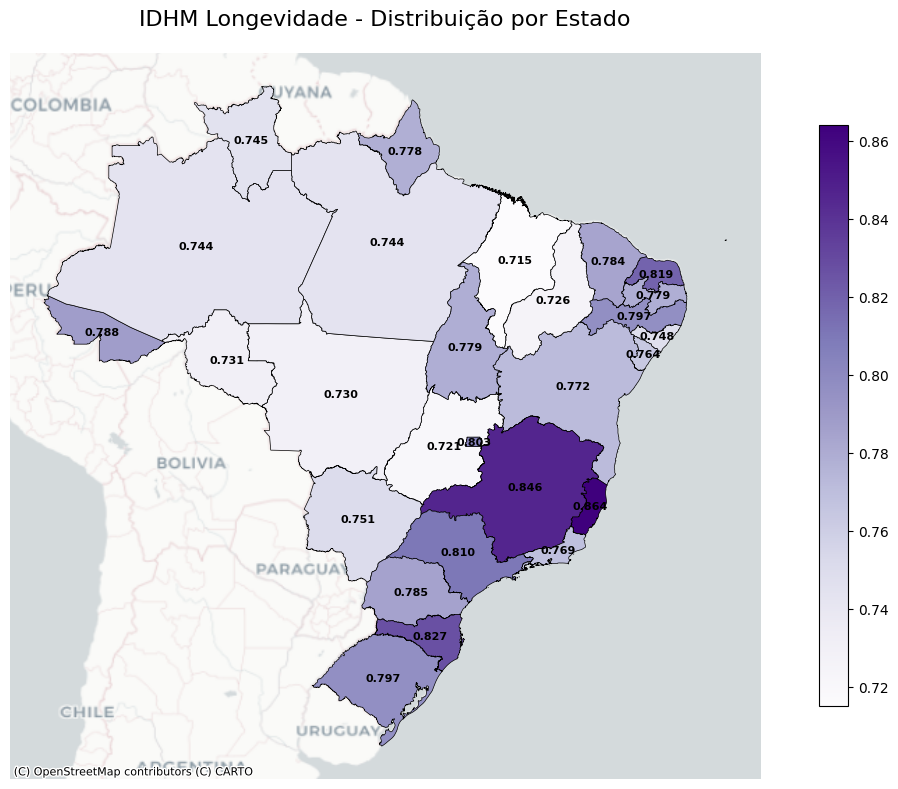

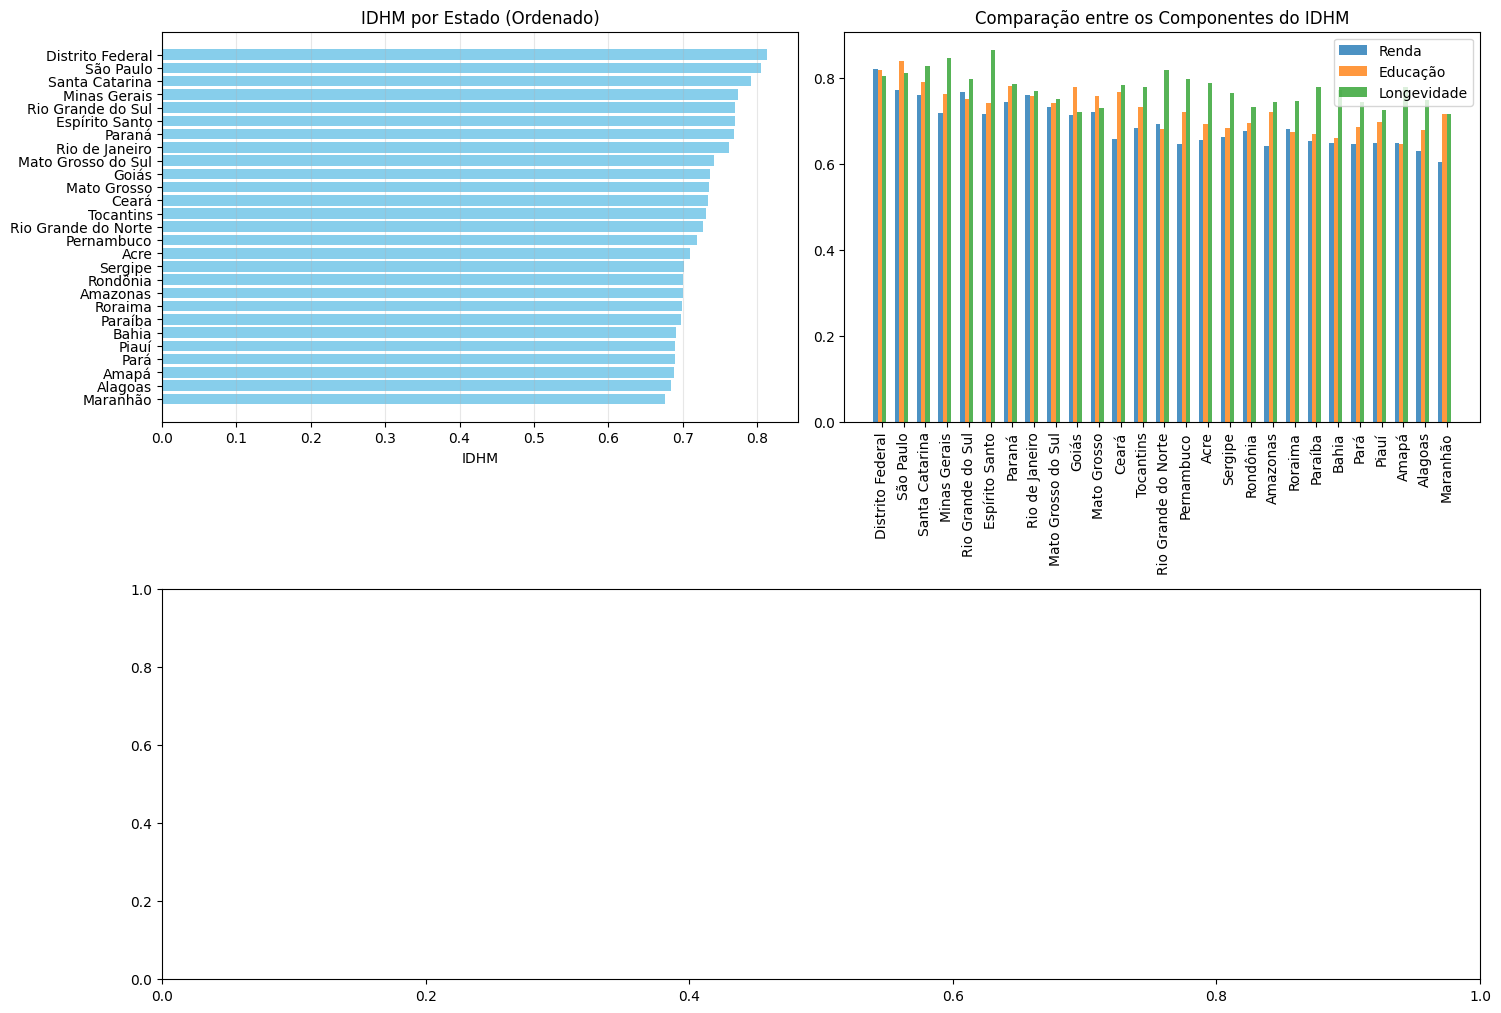

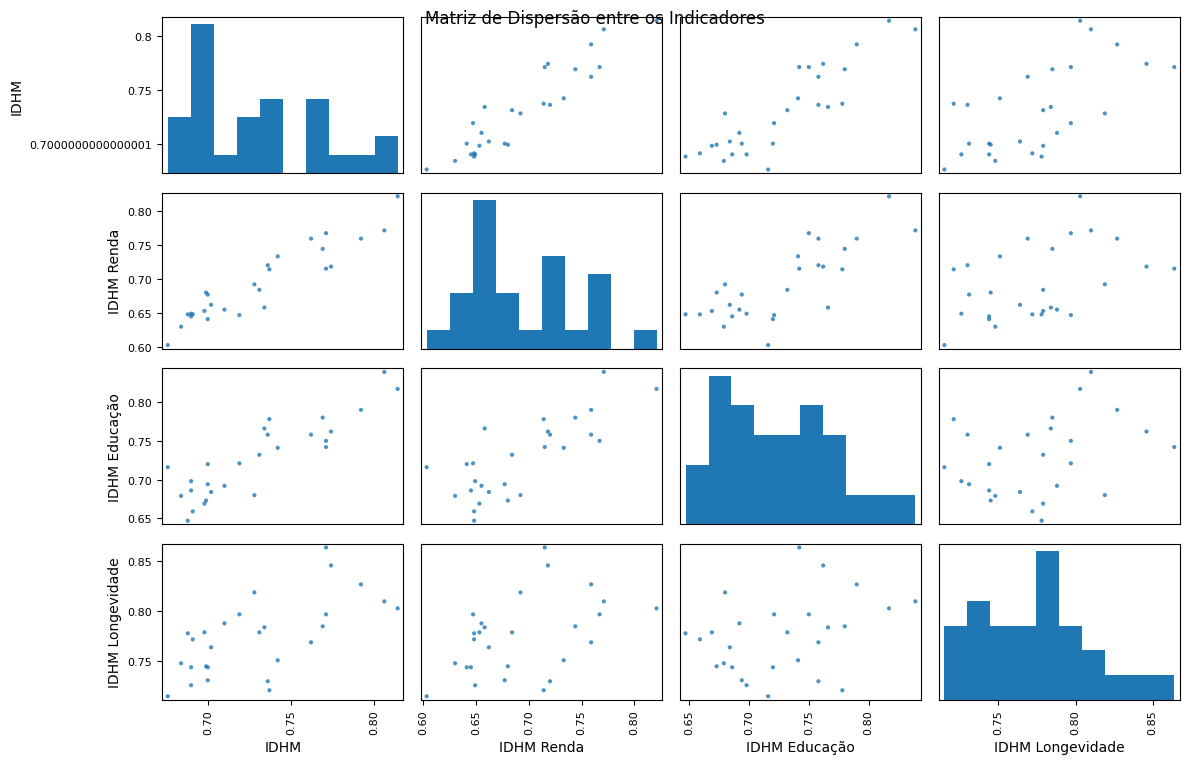


TABELA COMPLETA DOS DADOS (ORDENADO POR IDHM)
   Territorialidade  IDHM  IDHM Renda  IDHM Educação  IDHM Longevidade
   Distrito Federal 0.814       0.821          0.817             0.803
          São Paulo 0.806       0.771          0.839             0.810
     Santa Catarina 0.792       0.759          0.790             0.827
       Minas Gerais 0.774       0.718          0.762             0.846
  Rio Grande do Sul 0.771       0.767          0.750             0.797
     Espírito Santo 0.771       0.715          0.742             0.864
             Paraná 0.769       0.744          0.780             0.785
     Rio de Janeiro 0.762       0.759          0.758             0.769
 Mato Grosso do Sul 0.742       0.733          0.741             0.751
              Goiás 0.737       0.714          0.778             0.721
        Mato Grosso 0.736       0.720          0.758             0.730
              Ceará 0.734       0.658          0.766             0.784
          Tocantins 0.731     

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

# 1. Carregar seus dados
df = pd.read_excel('C:/Users/Lucas/Documents/projetos/Projetos de Dados/dados.xlsx')
print("="*80)
print("DADOS ORIGINAIS CARREGADOS:")
print("="*80)
print(df.head())
print(f"\nTotal de registros: {len(df)}")
print(f"Colunas disponíveis: {list(df.columns)}")

# 2. Carregar o GeoJSON do Brasil
url_geojson = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf = gpd.read_file(url_geojson)

print("\n" + "="*80)
print("DADOS GEOGRÁFICOS (GEOJSON):")
print("="*80)
print(gdf[['name', 'sigla']].head())
print(f"\nTotal de estados no GeoJSON: {len(gdf)}")

# 3. Padronizar nomes dos estados
mapeamento_estados = {
    'Distrito Federal': 'Distrito Federal',
    'São Paulo': 'São Paulo',
    'Santa Catarina': 'Santa Catarina',
    'Minas Gerais': 'Minas Gerais',
    'Rio Grande do Sul': 'Rio Grande do Sul',
    'Espírito Santo': 'Espírito Santo',
    'Paraná': 'Paraná',
    'Rio de Janeiro': 'Rio de Janeiro',
    'Mato Grosso do Sul': 'Mato Grosso do Sul',
    'Goiás': 'Goiás',
    'Mato Grosso': 'Mato Grosso',
    'Ceará': 'Ceará',
    'Tocantins': 'Tocantins',
    'Rio Grande do Norte': 'Rio Grande do Norte',
    'Pernambuco': 'Pernambuco',
    'Acre': 'Acre',
    'Sergipe': 'Sergipe',
    'Rondônia': 'Rondônia',
    'Amazonas': 'Amazonas',
    'Roraima': 'Roraima',
    'Paraíba': 'Paraíba',
    'Bahia': 'Bahia',
    'Pará': 'Pará',
    'Piauí': 'Piauí',
    'Amapá': 'Amapá',
    'Alagoas': 'Alagoas',
    'Maranhão': 'Maranhão'
}

df['nome_estado'] = df['Territorialidade'].map(mapeamento_estados)

# 4. Juntar dados com o GeoJSON
gdf_merged = gdf.merge(df, left_on='name', right_on='nome_estado', how='left')

print("\n" + "="*80)
print("DADOS COMBINADOS (GEOJSON + DADOS DO EXCEL):")
print("="*80)
print(gdf_merged[['name', 'sigla', 'IDHM', 'IDHM Renda', 'IDHM Educação', 'IDHM Longevidade']].head())

# 5. ANÁLISE ESTATÍSTICA DETALHADA
print("\n" + "="*80)
print("ANÁLISE ESTATÍSTICA DETALHADA POR INDICADOR")
print("="*80)

indicadores = ['IDHM', 'IDHM Renda', 'IDHM Educação', 'IDHM Longevidade']

for indicador in indicadores:
    print(f"\n{'-'*50}")
    print(f"ANÁLISE DO {indicador.upper()}")
    print(f"{'-'*50}")
    
    dados = df[indicador].dropna()
    print(f"Média: {dados.mean():.4f}")
    print(f"Mediana: {dados.median():.4f}")
    print(f"Desvio Padrão: {dados.std():.4f}")
    print(f"Mínimo: {dados.min():.4f}")
    print(f"Máximo: {dados.max():.4f}")
    print(f"Amplitude: {dados.max() - dados.min():.4f}")
    
    # Classificação por quartis
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    print(f"1º Quartil (Q1): {q1:.4f}")
    print(f"3º Quartil (Q3): {q3:.4f}")
    print(f"Intervalo Interquartil (IQR): {q3 - q1:.4f}")

# 6. RANKING DOS ESTADOS POR INDICADOR
print("\n" + "="*80)
print("RANKING DOS ESTADOS")
print("="*80)

for indicador in indicadores:
    print(f"\n{'-'*40}")
    print(f"TOP 5 - MELHORES EM {indicador.upper()}")
    print(f"{'-'*40}")
    top5 = df.nlargest(5, indicador)[['Territorialidade', indicador]]
    for i, (_, row) in enumerate(top5.iterrows(), 1):
        print(f"{i}º: {row['Territorialidade']} - {row[indicador]:.4f}")
    
    print(f"\n{'-'*40}")
    print(f"BOTTOM 5 - PIORES EM {indicador.upper()}")
    print(f"{'-'*40}")
    bottom5 = df.nsmallest(5, indicador)[['Territorialidade', indicador]]
    for i, (_, row) in enumerate(bottom5.iterrows(), 1):
        print(f"{i}º: {row['Territorialidade']} - {row[indicador]:.4f}")

# 7. MATRIZ DE CORRELAÇÃO DETALHADA
print("\n" + "="*80)
print("MATRIZ DE CORRELAÇÃO ENTRE INDICADORES")
print("="*80)
correlacao = df[indicadores].corr()
print(correlacao.round(3))

# 8. VISUALIZAÇÕES SEPARADAS
# Criar figuras individuais para cada indicador
for indicador, cmap in zip(indicadores, ['YlOrRd', 'Blues', 'Greens', 'Purples']):
    plt.figure(figsize=(12, 8))
    
    # Mapa
    ax = plt.subplot(1, 1, 1)
    gdf_merged.plot(column=indicador, ax=ax, legend=True, cmap=cmap, 
                   edgecolor='black', linewidth=0.5, legend_kwds={'shrink': 0.8})
    ctx.add_basemap(ax, crs=gdf_merged.crs.to_string(), source=ctx.providers.CartoDB.Positron)
    plt.title(f'{indicador} - Distribuição por Estado', fontsize=16, pad=20)
    plt.axis('off')
    
    # Adicionar valores nos estados
    for idx, row in gdf_merged.iterrows():
        if pd.notna(row[indicador]):
            plt.annotate(text=f"{row[indicador]:.3f}", 
                        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                        ha='center', va='center', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 9. GRÁFICOS DE BARRAS COMPARATIVOS
plt.figure(figsize=(15, 10))

# Ordenar dados para melhor visualização
df_sorted = df.sort_values('IDHM', ascending=True)

# Gráfico de barras horizontal
plt.subplot(2, 2, 1)
y_pos = np.arange(len(df_sorted))
plt.barh(y_pos, df_sorted['IDHM'], color='skyblue')
plt.yticks(y_pos, df_sorted['Territorialidade'])
plt.xlabel('IDHM')
plt.title('IDHM por Estado (Ordenado)')
plt.grid(axis='x', alpha=0.3)

# Comparação entre indicadores
plt.subplot(2, 2, 2)
width = 0.2
x_pos = np.arange(len(df))
plt.bar(x_pos - width*1.5, df['IDHM Renda'], width, label='Renda', alpha=0.8)
plt.bar(x_pos - width*0.5, df['IDHM Educação'], width, label='Educação', alpha=0.8)
plt.bar(x_pos + width*0.5, df['IDHM Longevidade'], width, label='Longevidade', alpha=0.8)
plt.xticks(x_pos, df['Territorialidade'], rotation=90)
plt.legend()
plt.title('Comparação entre os Componentes do IDHM')
plt.tight_layout()

plt.subplot(2, 1, 2)
# Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[indicadores], alpha=0.8, figsize=(12, 8), diagonal='hist')
plt.suptitle('Matriz de Dispersão entre os Indicadores', y=0.95)
plt.tight_layout()

plt.show()

# 10. TABELA COMPLETA DOS DADOS
print("\n" + "="*80)
print("TABELA COMPLETA DOS DADOS (ORDENADO POR IDHM)")
print("="*80)
df_ordenado = df.sort_values('IDHM', ascending=False)
print(df_ordenado[['Territorialidade', 'IDHM', 'IDHM Renda', 'IDHM Educação', 'IDHM Longevidade']].to_string(index=False))

# 11. EXPORTAR DADOS COMBINADOS (opcional)
# gdf_merged.to_file("dados_combinados.geojson", driver='GeoJSON')
# print("\nDados combinados exportados para 'dados_combinados.geojson'")